## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix, references, and information about GitHub and individual contribution will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

In [1]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import final dataset
final_dataset = pd.read_csv('final_dataset.csv')

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

Life expectancy is one of the most important metrics to use when assessing the health of a certain population. It is the average age of when one dies in that population. Throughout history there has been a relationship between developed countries and higher life expectancies [1] . Richer countries have more resources available and larger government budgets which can all contribute to higher life expectancies. More developed countries also have the ability to take advantage of their resources through improved healthcare systems and initiatives. Therefore we wanted to research what underdeveloped countries can do to help acheive higher life expectancies. Using data from around the world, we wanted to determine which factors were most associated with life expectancy in order to inform developing nations how to best use their limited resources to improve their population's life expectancies.

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. Interpret the problem as inference and/or prediction.

One of the most important jobs for governments to execute is to improve the life expectancy of their citizens. Therefore it is crucial for governments to develop ways to improve life expectancy. Furthermore, many countries, especially developing ones, have constrained budgets, and need to be able to improve life expectancy in the most efficient ways possible. Therefore we are exploring the best ways in which governments and health organizations can most efficiently target the factors related to life expectancy to best improve it. We plan to do so through linear regression model while focusing on inference and the relationship between our predictors and life expectancy. 

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

Link to dataset:
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?search=alcohol+effects

We used a World Health Organization (WHO) dataset, compiled on Kaggle. Our variable of interest in the dataset is life expectancy, but it includes a number of other public health and political variables like alcoholism rates, HIV/AIDs numbers, and income distribution. The source contains data from 193 countries, and it spans from 2000-2015. However, not every country has data from each year in that range. The full dataset contains 2938 rows with 22 columns (20 prediction variables).

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

Our primary stakeholders are the governments of countries who need to know how best to utilize their budgets to maximize life expectancies. This is especially important for countries such as developing countries that have limited amounts to spend. These governments need to identify which specific factors are most correlated with improving life expectancy to best understand how to efficiently allocate their resources. Other stakeholders include health organizations that can assist with advising these governments. By discovering which predictors are important and have the greatest impact on life expectancy, these organizations will have a better understanding of when and how to intervene. Lastly, individual people are stakeholders as well. They can use this data to guide their lifestyle choices such as deciding whether or not to get a certain vaccine, developing healthy habits, and choosing which country to live in. 

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

If the tables in this section take too much space, you may put them in the appendix, and just mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your final model(s).

In [8]:
data.describe()

,year,life_expectancy,adult_mortality,measles,under_five_deaths,polio,diphtheria,hiv_aids,gdp_per_capita,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2938.000000,2919.000000,2919.000000,2938.000000,2490.000000,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,2419.592240,42.035739,82.550188,82.324084,1.742103,7483.158469,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,11467.272489,160.445548,23.428046,23.716912,5.077785,14270.169342,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.000000,3.000000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.000000,78.000000,78.000000,0.100000,463.935626,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,17.000000,4.000000,93.000000,93.000000,0.100000,1766.947595,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,360.250000,28.000000,97.000000,97.000000,0.800000,5910.806335,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,212183.000000,2500.000000,99.000000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


In [9]:
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
measles                              0
under_five_deaths                    0
polio                               19
diphtheria                          19
hiv_aids                             0
gdp_per_capita                     448
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h3>Distribution of Values for Variables</h3>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Variable</th>
    <th>Missing Values</th>
    <th>Unique Values</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Elton John</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Xena Valenzuela</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Chun-Li</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

We began our data cleaning process by dropping 5 variables: 'population', 'bmi', 'infant_deaths', 'percentage_expenditure', 'hepatitis_b', 'alcohol', and 'total_expenditure'.

For population, bmi, and infant_deaths, we found that the dataset contained enough inaccurate data where the variables were not worth including. For infant_deaths in particular, the mean value was 29 deaths per 1000 births-- despite the world's current highest value being 27. Population and bmi had similarly suspect values.

For hepatitis_b, alcohol, and total_expenditure, the data was not inaccurate, but these variables had little correlation to our variable of interest and they had a number of missing values. Thus, we decided that they were better to exclude from our dataset rather than drop the entire row because of on missing value. We were hesitant to impute values for these variables, since we felt that countries situations are too complex for us to assume a particular value.

Next, we dropped the missing values from the'gdp_per_capita' and'income_composition_of_resources' columns. These variables were both important for our model, and thus felt they were important to include. Given some missing variables, we had to drop the rows with the missing data. The rest of the dataset had a very small number of missing values dispersed over a few different variables-- we dropped these rows as well. These rows were less significant since there were very few of them.

Our final step in the cleaning process was filtering out some illogical data that we found with our gdp_per_capita and under_five_deaths variables. While they were generally consistent with their data, we did need to filter gdp_per_capita to be above 108 -- the lowest value at the time period-- and filter under_five_deaths to be below 225 -- the highest value for the time period. This change filtered out a number of rows of data that had likely been mis-inputted.

After cleaning, we added a new variable to the dataset: continent. Using the continents dataset from class, we created a new dataframe with just the continent and country variables. Then, using a merge of this new dataframe with our larger dataset, we were able to line up the continent values with their appropriate countries in the full dataset.

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

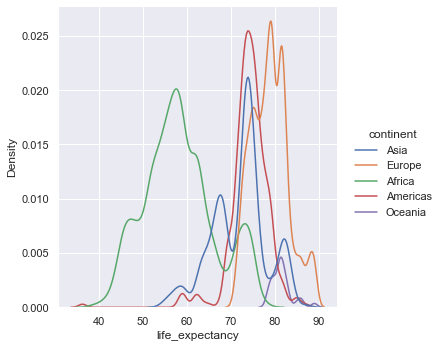

In [7]:
# Exploring different distributions of life expectancy by continent - Judd Moss
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(data = final_dataset, x = 'life_expectancy',kind = 'kde', hue='continent').set_titles("Life Expectancy Distribution by Continent")
plt.show()

- Different continents have different life expectancy distributions - therefore it makes sense to use continents as a categorical variable

<AxesSubplot:>

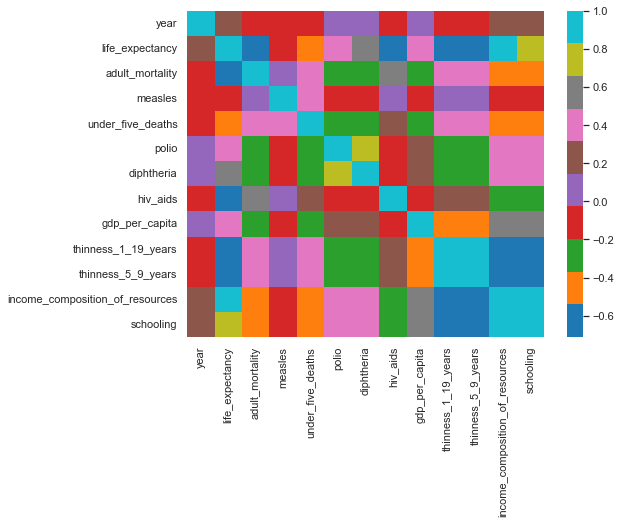

In [6]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(final_dataset.corr(), cmap='tab10')

**It appears most of our predictors are correlated with life expectancy. These ones have the strongest correlation and therefore we predicted would end up in our regression model:**

- `hiv_aids`
- `gdp_per_capita`
- `thinness_1_19_years` and `thinness_5_9_years`
- `income_composition_of_resources`
- `schooling`

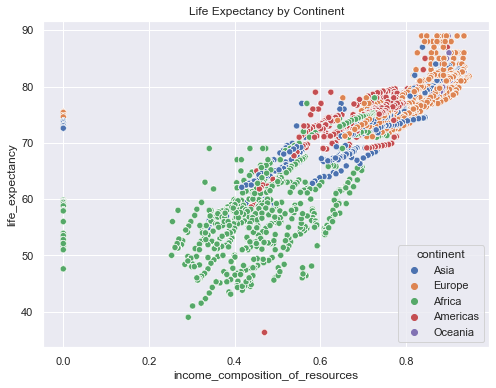

In [8]:
# check scatterplot of income_composition_of_resources and life expectancy - Judd
ax = sns.scatterplot(data = final_dataset, x = 'income_composition_of_resources',y = 'life_expectancy', hue='continent')
ax.set_title("Life Expectancy by Continent")
plt.show()

- `income_composition_of_resources` measures on a scale of 0 to 1, a countries ability to utilize its resources. We can see many of the countries with values of `income_composition_of_resources` have a higher life expectancy. 

## Approach

What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? Did the very first model you tried work? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

We chose a linear regression model with a focus on inference rather than prediction. This is because it is likely more important for a government to want to know which factors have the greatest effect on life expectancy rather than predicting an exact life expectancy. Therefore, they can focus on minimizing or maximizing the effect of certain predictors instead of just predicting what their life expectancy may be. In order to find the most helpful predictors, we focused on minimizing RMSE, maximizing R-squared, and making sure that each predictor was statistically significant in the final model. We followed a traditional approach of subset selection and later adding transformations and interactions that is detailed below in the "Developing the Model" section. However, we ran into some issues with messy data and multicollinearity that we were able to fix with EDA, data cleaning, and VIF analysis. Another problem we faced was balancing the interpretability of the model with adding the transformations and interactions that reduced RMSE and increased R-squared the most. We found that adding several transformaions and interactions helped the most with RMSE and R-squared but made it difficult to understand which predictors were responsible for affecting life expectancy and the magnitude of their effect. Therefore, we chose a model that was not our lowest RMSE and highest R-squared but still had relatively low RMSE and relatively high R-squared as well as being intrepretable.

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

We first started with creating a model that included all of the predictors, no interactions, and no transformations. This gave us baseline metrics to compare future models to. From this first model, we had an RMSE of 3.64, and R-squared of 0.875, and all predictors except for thinness_1_19_years were statistically significant. These metrics were already looking similar to what we wanted, but we believed that we could improve them further. 

Our next step was to create a model with the 9 selected predictors from a forward stepwise selection that helped to efficiently choose the best predictors and address some multicollinearity. Those predictors were income_composition_of_resources, hiv_aids, adult_mortality, under_five_deaths, diphtheria, thinness_1_19_years, gdp_per_capita, polio, and measles. After creating these two models (one with all of the predictors and one with the predictors selected from the forward stepwise selection procedure), we compared the R-squared and RMSE of both. We found that R-squared decreased from 0.875 to 0.861 and RMSE increased from 3.64 to 3.85 when we went from the original model to the forward stepwise selection model. This was the opposite of what we expected, so we decided to visualize the relationships between some of the predictors and the residuals.

From these visualizations, we found that income_composition_of_resources, adult_mortality, thinness_1_19_years, and under_five_deaths violated the linearity assumption and that a combination of quadratic and cubic transformations could help address this. Additionally, polio and hiv_aids violated both the linearity and constant variance assumptions and a combination of quadratic, cubic, and log transformations could help with this. The equation for the third model we created with these transformations is given by:
- ols_object = sm.ols(formula = 'life_expectancy ~ adult_mortality + I(adult_mortality ** 2) + I(adult_mortality ** 3) + income_composition_of_resources + I(income_composition_of_resources ** 2) + I(income_composition_of_resources ** 3) + measles + under_five_deaths + I(under_five_deaths ** 2) + I(under_five_deaths ** 3) + polio + I(polio ** 2) + I(polio ** 3) + np.log(polio) + diphtheria + hiv_aids + I(hiv_aids ** 2) + I(hiv_aids ** 3) + np.log(hiv_aids) + gdp_per_capita + thinness_1_19_years + I(thinness_1_19_years ** 2)', data=train).fit( )

This third model returned an R-squared of .922 and an RMSE of 2.93, an improvement from the previous two models.

Next, we wanted to make sure that influential points were not affecting our model. We calculated the leverage statistic for each oversavtion, found the average leverage of all the points, and determined the cutoff for high leverage to be 4 times the average leverage. From this, we dropped the influential points from our train data and refit the model. After dropping influential points the model RMSE decreased from 2.93 to 2.926 years and R-squared increased from .922 to .923.

We also wanted to explore if any categorical variables could improve the model even further because the forward stepwise selection only seemed to take the quantitative variables into account. After creating a new variable, continent, by categorizing each observation by their country into their respective continents, we added continent as a predictor to the model. This improved the model by reducing RMSE to 2.845 and increasing R-squared to .926.

Although the RMSE and R-squared from this fifth model were the best of all the models so far, we realized that the multiple transformations made the model extremely hard to intrepret. When considering our stakeholders and what they would be looking for, we found out that it may be hard to draw conclusions about the effects of specific predictors when they have had multiple transformations. Therefore, we decided to create a sixth model that was a better balance between maximizing metrics and inrpretability. This is given by the equation below: 
- **final model equation**: 
- ols_object = sm.ols(formula ='life_expectancy ~ continent + income_composition_of_resources + I(income_composition_of_resources ** 2) + measles + under_five_deaths + polio + diphtheria + diphtheria * continent + hiv_aids + np.log(gdp_per_capita)', data=train_filtered).fit( )

This model returned an R-squared of .896 and an RMSE of 3.264 which was still an improvement from the first two models fitted but was much more intrepretable than the third, fourth, and fifth models. We chose to sacrifice some R-squared and RMSE because we are focused on inference rather than prediction. Additionally, each of the predictors were still statistically significant. Lastly, we found that the train RSE was 3.388 for this model which was very similar to the test RMSE. This indicates that there was not overfitting.

We believe we were successful in achieving our goal because we were able to create a model with relatively low RMSE, relatively high R-squared, had all statistically significant predictors, was possible to draw relevant conclusions from, and did not overfit.

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

We created an inference model, meaning that we hope to learn information about which individual predictors will affect a country's life expectancy. Given the fact that public health dangers -- like poverty, starvation, and disease -- are relatively constant in their effects on a population, our model should be able to work for decades to come. As we have stated, our model provides the most value to developing countries in particular, and the inferences that these nations could make based on our model will hold true for a long period of time. After a few decades, and with breakthroughs in modern medicine, our inference values will eventually become obsolete because certain diseases will no longer harm humans as severely as they do today.

Additionally, a wealthy, developed nation should not turn to our model for assistance in increasing their nation's life expectancy. While our model could likely increase their value marginally, it works most efficiently for underdeveloped and developed economies.

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

We believe that our final model provides vital information to our stakeholders on how they should allocate their limited resources. The majority of this information falls in the public health sphere.

By looking into vaccination rates for different diseases, our stakeholders can make the important decision on how to spend their public health budget. Looking at diphtheria vaccination percentage in Africa, the coefficient on this variable was 0.0562. For polio vaccination rates, on the other hand, the coefficient was 0.0179. This means that diphtheria vaccination in Africa was more than 3 times more effective at increasing life expectancy than polio vaccination. Obviously, developing nations should consult with their own public health officials change policy in a way that uniquely fits their own country. However, for an African nation with a limited budget needing to pick between the most effective vaccine, our model allows them to do so. Another valuable change that we added to our model was an interaction variable between diphtheria and continent. Now, when we consider dipheria rates in the Americas, the coefficient falls to 0.0148. Not only have we shown that the Americas are less significantly affected by diphtheria than Africa -- something that most people likely knew -- but we have concrete evidence for the fact that it is severe at a similar rate to polio. For developing nations in the Americas, they could use this information to dictate their budgets as well.

One of the strongest coefficients we had was the HIV/AIDs variable, which had a coefficient of -0.4475. This variable measured deaths caused by HIV/AIDs per 1,000 live births in a nation. In this case, most developed nations had extremely low values for this variable. However, for each increase in one death per 1,000 live births, the average life expectancy of a nation should expect to drop by about -0.45 years. This variable overall is indicative of the prevalence of HIV/AIDs in a nation overall, since children get the virus in the womb from their mothers being infected. By demonstrating the severe impact of this disease, our stakeholders should place combatting HIV/AIDs as one of their top public health priorities.

As we knew that economic variables like gdp_per_capita were correlated with life expectancy, we also included these in our model. However, since all nations are constantly fighting to increase their wealth already, our model does not provide valuable feedback in this regard.

Overall, given updated data every few years, our model has no clear date where it will become obsolete. In the long term, if global poverty were to subsist, then our stakeholders would no longer exist. However, this does not seem unrealistic any time soon. In the mean time, we believe that our stakeholders -- underdeveloped nations and organizations looking to aid them -- can gain lots of valuable information from our model.

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Elton John</td>
    <td>Data cleaning and EDA</td>
    <td>Cleaned data to impute missing values and developed visualizations to identify appropriate variable transformations.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Xena Valenzuela</td>
    <td>Assumptions and interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions.</td>
    <td>120</td>
  </tr>
    <tr>
    <td>Sankaranarayanan Balasubramanian</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>130</td>    
  </tr>
    <tr>
    <td>Chun-Li</td>
    <td>Variable selection and addressing overfitting</td>
    <td>Performed variable selection on an exhaustive set of predictors to address multicollinearity and overfitting.</td>
    <td>150</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Roser, M., Ortiz-Ospina, E., &amp; Ritchie, H. (2013, May 23). Life expectancy. Our World in Data. Retrieved March 12, 2023, from https://ourworldindata.org/life-expectancy 


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.